# Chi-square Tests

Each row in the dataset represents a single person who was counted in the 1990 US Census, and contains information about their income and demographics. Here are some of the relevant columns:

- `age` -- how old the person is 
- `workclass` -- the type of sector the person is employed in.
- `race` -- the race of the person.
- `sex` -- the gender of the person, either Male or Female.

In [44]:
import pandas as pd
import numpy as np
from numpy.random import random
import matplotlib.pyplot as plt
from scipy.stats import chisquare

In [2]:
income = pd.read_csv('income.csv')

### Exploring the Data

In [3]:
income.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
income.shape

(32561, 15)

In [18]:
income.columns.values

array(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'high_income'], dtype=object)

### The Proportional Difference

In [24]:
income[income['sex'] == ' Male'].shape[0]

21790

In [26]:
income[income['sex'] == ' Female'].shape[0]

10771

In [27]:
income[income['sex'] == ' Male'].shape[0] / income.shape[0]

0.6692054912318418

In [28]:
income[income['sex'] == ' Female'].shape[0] / income.shape[0]

0.33079450876815825

The full Census shows that the US is about 50% Male and 50% Female.

In [29]:
female_diff = (10771-16280.5)/16280.5
female_diff

-0.33841098246368356

In [30]:
male_diff = (21790-16280.5)/16280.5
male_diff

0.33841098246368356

In [31]:
male_diff + female_diff

0.0

### Updating the formula

In [32]:
female_diff = (10771 - 16280.5) ** 2 / 16280.5
female_diff

1864.4753078836645

In [33]:
male_diff = (21790 - 16280.5) ** 2 / 16280.5
male_diff

1864.4753078836645

In [34]:
gender_chisq = female_diff + male_diff
gender_chisq

3728.950615767329

### Generating Chi-squared distribution

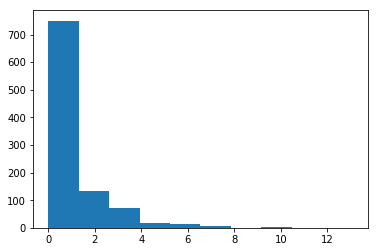

In [37]:
chi_squared_values = []

for i in range(1000):
    rand_seq = random((32561,))
    rand_seq[rand_seq < 0.5] = 0
    rand_seq[rand_seq >= 0.5] = 1
    male_count = len(rand_seq[rand_seq == 0])
    female_count = len(rand_seq[rand_seq == 1])
    male_diff = (male_count - 16280.5) ** 2 / 16280.5
    female_diff = (female_count-16280.5) **2 / 16280.5
    chi_squared_values.append(male_diff + female_diff)
    
plt.hist(chi_squared_values)
plt.show()

### Smaller samples

In [38]:
female_diff = (107.71-162.805)**2/162.805
male_diff = (217.90-162.805)**2/162.805
gender_chisq = male_diff + female_diff
gender_chisq

37.2895061576733

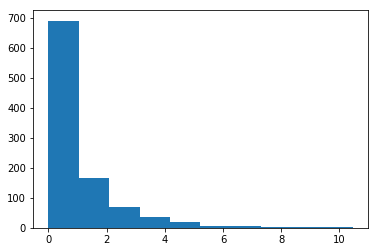

In [39]:
chi_squared_values = []

for i in range(1000):
    rand_seq = random((300,))
    rand_seq[rand_seq < 0.5] = 0
    rand_seq[rand_seq >= 0.5] = 1
    male_count = len(rand_seq[rand_seq == 0])
    female_count = len(rand_seq[rand_seq == 1])
    male_diff = (male_count - 150) ** 2 / 150
    female_diff = (female_count-150) **2 / 150
    chi_squared_values.append(male_diff + female_diff)
    
plt.hist(chi_squared_values)
plt.show()

### Multiple categories and higher degrees of freedom

In [41]:
observed = [27816, 3124, 1039, 311, 271]
expected = [26146.5, 3939.9, 944.3, 260.5, 1269.8]

diffs = [] 

for i, obs in enumerate(observed): 
    diffs.append((obs - expected[i]) ** 2 / expected[i])
    
race_chisq = sum(diffs)
race_chisq

1080.485936593381

### Chi-square using scipy

In [43]:
race_pvalue = chisquare(observed,expected)
race_pvalue

NameError: name 'chisquare' is not defined